# Exploração Inicial

Este notebook visa criar o primeior experimento do modelo de predição de preços de laptop baseado no conjunto de dados do Kaggle

In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

%matplotlib inline

import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('../data/raw/laptopPrice.csv')
df.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0


## Pré-processamento dos dados
Transformar dados em caixa baixa

In [3]:
df_transformed = df.copy()

df_transformed = df_transformed.astype(str).apply(lambda x: x.str.lower())

df_transformed.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,asus,intel,core i3,10th,4 gb,ddr4,0 gb,1024 gb,windows,64-bit,0 gb,casual,no warranty,no,no,34649,2 stars,3,0
1,lenovo,intel,core i3,10th,4 gb,ddr4,0 gb,1024 gb,windows,64-bit,0 gb,casual,no warranty,no,no,38999,3 stars,65,5
2,lenovo,intel,core i3,10th,4 gb,ddr4,0 gb,1024 gb,windows,64-bit,0 gb,casual,no warranty,no,no,39999,3 stars,8,1
3,asus,intel,core i5,10th,8 gb,ddr4,512 gb,0 gb,windows,32-bit,2 gb,casual,no warranty,no,no,69990,3 stars,0,0
4,asus,intel,celeron dual,not available,4 gb,ddr4,0 gb,512 gb,windows,64-bit,0 gb,casual,no warranty,no,no,26990,3 stars,0,0


Remoção de colunas que não serão utilizadas

In [4]:
df_transformed.drop('rating', axis=1, inplace=True)
df_transformed.drop('Number of Ratings', axis=1, inplace=True)
df_transformed.drop('Number of Reviews', axis=1, inplace=True)
df_transformed.drop('msoffice', axis=1, inplace=True)
df_transformed.drop('processor_gnrtn', axis=1, inplace=True)

df_transformed.head()

,brand,processor_brand,processor_name,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,Price
0,asus,intel,core i3,4 gb,ddr4,0 gb,1024 gb,windows,64-bit,0 gb,casual,no warranty,no,34649
1,lenovo,intel,core i3,4 gb,ddr4,0 gb,1024 gb,windows,64-bit,0 gb,casual,no warranty,no,38999
2,lenovo,intel,core i3,4 gb,ddr4,0 gb,1024 gb,windows,64-bit,0 gb,casual,no warranty,no,39999
3,asus,intel,core i5,8 gb,ddr4,512 gb,0 gb,windows,32-bit,2 gb,casual,no warranty,no,69990
4,asus,intel,celeron dual,4 gb,ddr4,0 gb,512 gb,windows,64-bit,0 gb,casual,no warranty,no,26990


Romoção do termo "gb" pois a coluna será intereiramente numérica

In [5]:
df_transformed['ram_gb'] = df_transformed['ram_gb'].replace({' gb':''}, regex=True)
df_transformed['ssd'] = df_transformed['ssd'].replace({' gb':''}, regex=True)
df_transformed['graphic_card_gb'] = df_transformed['graphic_card_gb'].replace({' gb':''}, regex=True)
df_transformed['hdd'] = df_transformed['hdd'].replace({' gb':''}, regex=True)

df_transformed.head()

,brand,processor_brand,processor_name,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,Price
0,asus,intel,core i3,4,ddr4,0,1024,windows,64-bit,0,casual,no warranty,no,34649
1,lenovo,intel,core i3,4,ddr4,0,1024,windows,64-bit,0,casual,no warranty,no,38999
2,lenovo,intel,core i3,4,ddr4,0,1024,windows,64-bit,0,casual,no warranty,no,39999
3,asus,intel,core i5,8,ddr4,512,0,windows,32-bit,2,casual,no warranty,no,69990
4,asus,intel,celeron dual,4,ddr4,0,512,windows,64-bit,0,casual,no warranty,no,26990


In [6]:
df_transformed['warranty'] = df_transformed['warranty'].replace({' (years|year)':''}, regex=True)

df_transformed.head()

,brand,processor_brand,processor_name,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,Price
0,asus,intel,core i3,4,ddr4,0,1024,windows,64-bit,0,casual,no warranty,no,34649
1,lenovo,intel,core i3,4,ddr4,0,1024,windows,64-bit,0,casual,no warranty,no,38999
2,lenovo,intel,core i3,4,ddr4,0,1024,windows,64-bit,0,casual,no warranty,no,39999
3,asus,intel,core i5,8,ddr4,512,0,windows,32-bit,2,casual,no warranty,no,69990
4,asus,intel,celeron dual,4,ddr4,0,512,windows,64-bit,0,casual,no warranty,no,26990


In [7]:
df_transformed['warranty'] = df_transformed['warranty'].replace({'no warranty':'0'}, regex=True)
df_transformed['Touchscreen'] = df_transformed['Touchscreen'].replace({'no':'0'}, regex=True)
df_transformed['Touchscreen'] = df_transformed['Touchscreen'].replace({'yes':'1'}, regex=True)

df_transformed.head()

,brand,processor_brand,processor_name,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,Price
0,asus,intel,core i3,4,ddr4,0,1024,windows,64-bit,0,casual,0,0,34649
1,lenovo,intel,core i3,4,ddr4,0,1024,windows,64-bit,0,casual,0,0,38999
2,lenovo,intel,core i3,4,ddr4,0,1024,windows,64-bit,0,casual,0,0,39999
3,asus,intel,core i5,8,ddr4,512,0,windows,32-bit,2,casual,0,0,69990
4,asus,intel,celeron dual,4,ddr4,0,512,windows,64-bit,0,casual,0,0,26990


In [8]:
df_transformed['ram_gb'] = pd.to_numeric(df_transformed['ram_gb'], errors='coerce').fillna(0).astype(np.int64)
df_transformed['hdd'] = pd.to_numeric(df_transformed['hdd'], errors='coerce').fillna(0).astype(np.int64)
df_transformed['ssd'] = pd.to_numeric(df_transformed['ssd'], errors='coerce').fillna(0).astype(np.int64)
df_transformed['graphic_card_gb'] = pd.to_numeric(df_transformed['graphic_card_gb'], errors='coerce').fillna(0).astype(np.int64)
df_transformed['warranty'] = pd.to_numeric(df_transformed['warranty'], errors='coerce').fillna(0).astype(np.int64)
df_transformed['Touchscreen'] = pd.to_numeric(df_transformed['Touchscreen'], errors='coerce').fillna(0).astype(np.int64)
df_transformed['Price'] = pd.to_numeric(df_transformed['Price'], errors='coerce').fillna(0).astype(np.int64)

df_transformed.head()

,brand,processor_brand,processor_name,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,Price
0,asus,intel,core i3,4,ddr4,0,1024,windows,64-bit,0,casual,0,0,34649
1,lenovo,intel,core i3,4,ddr4,0,1024,windows,64-bit,0,casual,0,0,38999
2,lenovo,intel,core i3,4,ddr4,0,1024,windows,64-bit,0,casual,0,0,39999
3,asus,intel,core i5,8,ddr4,512,0,windows,32-bit,2,casual,0,0,69990
4,asus,intel,celeron dual,4,ddr4,0,512,windows,64-bit,0,casual,0,0,26990


In [9]:
replace_dict = {'mac': 'other', 'dos': 'other'}
df_transformed['os'].replace(replace_dict, inplace=True)

replace_dict = {'lpddr4x': 'other', 'lpddr4': 'other', 'lpddr3': 'other', 'ddr5': 'other', 'ddr3': 'other'}
df_transformed['ram_type'].replace(replace_dict, inplace=True)

replace_dict = {'core i9': 'other', 'pentium quad': 'other', 'm1': 'other', 'celeron dual': 'other', 'ryzen 9': 'other', 'ryzen 3': 'other'}
df_transformed['processor_name'].replace(replace_dict, inplace=True)

replace_dict = {'acer': 'other', 'msi': 'other', 'apple': 'other', 'avita': 'other'}
df_transformed['brand'].replace(replace_dict, inplace=True)

df_transformed.head()

,brand,processor_brand,processor_name,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,Price
0,asus,intel,core i3,4,ddr4,0,1024,windows,64-bit,0,casual,0,0,34649
1,lenovo,intel,core i3,4,ddr4,0,1024,windows,64-bit,0,casual,0,0,38999
2,lenovo,intel,core i3,4,ddr4,0,1024,windows,64-bit,0,casual,0,0,39999
3,asus,intel,core i5,8,ddr4,512,0,windows,32-bit,2,casual,0,0,69990
4,asus,intel,other,4,ddr4,0,512,windows,64-bit,0,casual,0,0,26990


In [10]:
df_transformed.drop_duplicates(inplace=True)

In [11]:
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 780 entries, 0 to 822
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   brand            780 non-null    object
 1   processor_brand  780 non-null    object
 2   processor_name   780 non-null    object
 3   ram_gb           780 non-null    int64 
 4   ram_type         780 non-null    object
 5   ssd              780 non-null    int64 
 6   hdd              780 non-null    int64 
 7   os               780 non-null    object
 8   os_bit           780 non-null    object
 9   graphic_card_gb  780 non-null    int64 
 10  weight           780 non-null    object
 11  warranty         780 non-null    int64 
 12  Touchscreen      780 non-null    int64 
 13  Price            780 non-null    int64 
dtypes: int64(7), object(7)
memory usage: 91.4+ KB


In [12]:
df_transformed

,brand,processor_brand,processor_name,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,Price
0,asus,intel,core i3,4,ddr4,0,1024,windows,64-bit,0,casual,0,0,34649
1,lenovo,intel,core i3,4,ddr4,0,1024,windows,64-bit,0,casual,0,0,38999
2,lenovo,intel,core i3,4,ddr4,0,1024,windows,64-bit,0,casual,0,0,39999
3,asus,intel,core i5,8,ddr4,512,0,windows,32-bit,2,casual,0,0,69990
4,asus,intel,other,4,ddr4,0,512,windows,64-bit,0,casual,0,0,26990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,asus,amd,other,4,ddr4,1024,0,windows,64-bit,0,casual,1,0,135990
819,asus,amd,other,4,ddr4,1024,0,windows,64-bit,0,casual,1,0,144990
820,asus,amd,other,4,ddr4,1024,0,windows,64-bit,4,casual,1,0,149990
821,asus,amd,other,4,ddr4,1024,0,windows,64-bit,4,casual,1,0,142990


In [13]:
df_transformed = pd.get_dummies(df_transformed, dtype=int, columns=['brand'], prefix='brand')
df_transformed = pd.get_dummies(df_transformed, dtype=int, columns=['processor_brand'], prefix='processor_brand')
df_transformed = pd.get_dummies(df_transformed, dtype=int, columns=['processor_name'], prefix='processor_name')

df_transformed = pd.get_dummies(df_transformed, dtype=int, columns=['os'], prefix='os')
df_transformed = pd.get_dummies(df_transformed, dtype=int, columns=['weight'], prefix='weight')
df_transformed = pd.get_dummies(df_transformed, dtype=int, columns=['warranty'], prefix='warranty')
df_transformed = pd.get_dummies(df_transformed, dtype=int, columns=['Touchscreen'], prefix='Touchscreen')
df_transformed = pd.get_dummies(df_transformed, dtype=int, columns=['ram_gb'], prefix='ram_gb')

df_transformed = pd.get_dummies(df_transformed, dtype=int, columns=['hdd'], prefix='hdd')
df_transformed = pd.get_dummies(df_transformed, dtype=int, columns=['ssd'], prefix='ssd')

df_transformed = pd.get_dummies(df_transformed, dtype=int, columns=['graphic_card_gb'], prefix='graphic_card_gb')
df_transformed = pd.get_dummies(df_transformed, dtype=int, columns=['ram_type'], prefix='ram_type')

df_transformed = pd.get_dummies(df_transformed, dtype=int, columns=['os_bit'], prefix='os_bit')

df_transformed.head()

,Price,brand_asus,brand_dell,brand_hp,brand_lenovo,brand_other,processor_brand_amd,processor_brand_intel,processor_brand_m1,processor_name_core i3,...,ssd_3072,graphic_card_gb_0,graphic_card_gb_2,graphic_card_gb_4,graphic_card_gb_6,graphic_card_gb_8,ram_type_ddr4,ram_type_other,os_bit_32-bit,os_bit_64-bit
0,34649,1,0,0,0,0,0,1,0,1,...,0,1,0,0,0,0,1,0,0,1
1,38999,0,0,0,1,0,0,1,0,1,...,0,1,0,0,0,0,1,0,0,1
2,39999,0,0,0,1,0,0,1,0,1,...,0,1,0,0,0,0,1,0,0,1
3,69990,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
4,26990,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,1


# Treinamento

In [14]:
features = list(df_transformed.columns)
features.remove('Price')

X = df_transformed[features]
y = df_transformed['Price']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.3, random_state=42)

In [16]:
model = Ridge()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R2: {r2}')


Mean Squared Error: 633129215.0185882
Mean Absolute Error: 15597.902044797182
R2: 0.6636444639308601


In [17]:
data = {
    'brand': 'dell',
    'processor_brand': 'intel',
    'processor_name': 'core i5',
    'os': 'windows',
    'weight': 'casual',
    'warranty': '3',
    'Touchscreen': '0',
    'ram_gb': '16',
    'hdd': '0',
    'ssd': '256',
    'graphic_card_gb': '4',
    'ram_type': 'ddr4',
    'os_bit': '64'
}

data_processed = []

data_processed.append(1) if data['brand'] == 'asus' else data_processed.append(0)
data_processed.append(1) if data['brand'] == 'dell' else data_processed.append(0)
data_processed.append(1) if data['brand'] == 'hp' else data_processed.append(0)
data_processed.append(1) if data['brand'] == 'lenovo' else data_processed.append(0)
data_processed.append(1) if data['brand'] == 'other' else data_processed.append(0)

data_processed.append(1) if data['processor_brand'] == 'amd' else data_processed.append(0)
data_processed.append(1) if data['processor_brand'] == 'intel' else data_processed.append(0)
data_processed.append(1) if data['processor_brand'] == 'm1' else data_processed.append(0)

data_processed.append(1) if data['processor_name'] == 'core i3' else data_processed.append(0)
data_processed.append(1) if data['processor_name'] == 'core i5' else data_processed.append(0)
data_processed.append(1) if data['processor_name'] == 'core i7' else data_processed.append(0)
data_processed.append(1) if data['processor_name'] == 'ryzen 5' else data_processed.append(0)
data_processed.append(1) if data['processor_name'] == 'ryzen 7' else data_processed.append(0)
data_processed.append(1) if data['processor_name'] == 'other' else data_processed.append(0)

data_processed.append(1) if data['os'] == 'other' else data_processed.append(0)
data_processed.append(1) if data['os'] == 'windows' else data_processed.append(0)

data_processed.append(1) if data['weight'] == 'casual' else data_processed.append(0)
data_processed.append(1) if data['weight'] == 'gaming' else data_processed.append(0)
data_processed.append(1) if data['weight'] == 'thinnlight' else data_processed.append(0)

data_processed.append(1) if data['warranty'] == '0' else data_processed.append(0)
data_processed.append(1) if data['warranty'] == '1' else data_processed.append(0)
data_processed.append(1) if data['warranty'] == '2' else data_processed.append(0)
data_processed.append(1) if data['warranty'] == '3' else data_processed.append(0)

data_processed.append(1) if data['Touchscreen'] == '0' else data_processed.append(0)
data_processed.append(1) if data['Touchscreen'] == '1' else data_processed.append(0)

data_processed.append(1) if data['ram_gb'] == '4' else data_processed.append(0)
data_processed.append(1) if data['ram_gb'] == '8' else data_processed.append(0)
data_processed.append(1) if data['ram_gb'] == '16' else data_processed.append(0)
data_processed.append(1) if data['ram_gb'] == '32' else data_processed.append(0)

data_processed.append(1) if data['hdd'] == '0' else data_processed.append(0)
data_processed.append(1) if data['hdd'] == '512' else data_processed.append(0)
data_processed.append(1) if data['hdd'] == '1024' else data_processed.append(0)
data_processed.append(1) if data['hdd'] == '2048' else data_processed.append(0)

data_processed.append(1) if data['ssd'] == '0' else data_processed.append(0)
data_processed.append(1) if data['ssd'] == '128' else data_processed.append(0)
data_processed.append(1) if data['ssd'] == '256' else data_processed.append(0)
data_processed.append(1) if data['ssd'] == '512' else data_processed.append(0)
data_processed.append(1) if data['ssd'] == '1024' else data_processed.append(0)
data_processed.append(1) if data['ssd'] == '2048' else data_processed.append(0)
data_processed.append(1) if data['ssd'] == '3072' else data_processed.append(0)

data_processed.append(1) if data['graphic_card_gb'] == '0' else data_processed.append(0)
data_processed.append(1) if data['graphic_card_gb'] == '2' else data_processed.append(0)
data_processed.append(1) if data['graphic_card_gb'] == '4' else data_processed.append(0)
data_processed.append(1) if data['graphic_card_gb'] == '6' else data_processed.append(0)
data_processed.append(1) if data['graphic_card_gb'] == '8' else data_processed.append(0)

data_processed.append(1) if data['ram_type'] == 'ddr4' else data_processed.append(0)
data_processed.append(1) if data['ram_type'] == 'other' else data_processed.append(0)

data_processed.append(1) if data['os_bit'] == '32' else data_processed.append(0)
data_processed.append(1) if data['os_bit'] == '64' else data_processed.append(0)


In [18]:
dados_inferencia = np.array(data_processed).reshape(1, -1)
dados_inferencia

array([[0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
        1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 0, 1]])

In [19]:
result = model.predict(dados_inferencia)
result[0]

109143.85278623152

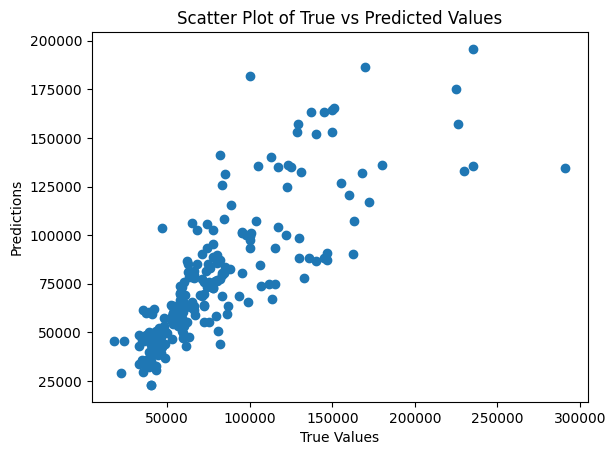

In [20]:
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Scatter Plot of True vs Predicted Values')
plt.show()